# Moving Average

## Data review

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
read_dir = r'C:\Users\ed_22\Documents\Selected-Statistics-Topics\Partial-II\Practice'
file_name = 'AirPassengers.csv'
read_path = os.path.join(read_dir, file_name)

In [3]:
data = pd.read_csv(read_path)
data.columns = ['month', 'n_passengers']
data = data.set_index('month')
data.index = pd.to_datetime(data.index)
data.head()

,n_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


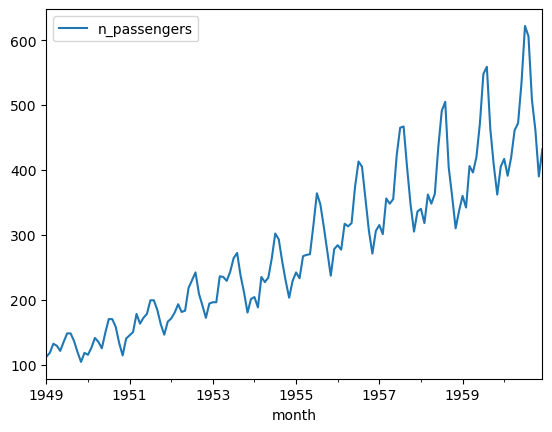

In [4]:
data.plot()
plt.show()

# Simple Moving Average
A **Simple Moving Average** (SMA) is a statistical method used in time series analysis to smooth out short-term fluctuations in the data and highlight *long-term trends*. 

It's one of the simplest forms of moving averages, calculated by averaging a fixed number of past data points.

## Characteristics
- Window Size: SMA is calculated using a specified number of data points, known as the window size. For example, a 3-month moving average takes the average of the last three months.
- Equal Weights: Each data point within the window is given equal importance or weight in the calculation of the average.
- Smoothing: By averaging the data points, the SMA helps to reduce noise, making it easier to see underlying patterns and trends in the data.

## Formula
$$SMA_t=\dfrac{1}{w}\sum_{i=0}^{w-1}Y_{t-i}$$

where
- $w$ is the window
- $Y_{t-i}$ are the values of the time series.

## Implementing in Python

In [5]:
data['rolling'] = data['n_passengers'].rolling(3).mean()
data.head()

,n_passengers,rolling
month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333


In [9]:
data.tail(3)

,n_passengers,rolling
month,,
1960-10-01,461,525.000000
1960-11-01,390,453.000000
1960-12-01,432,427.666667


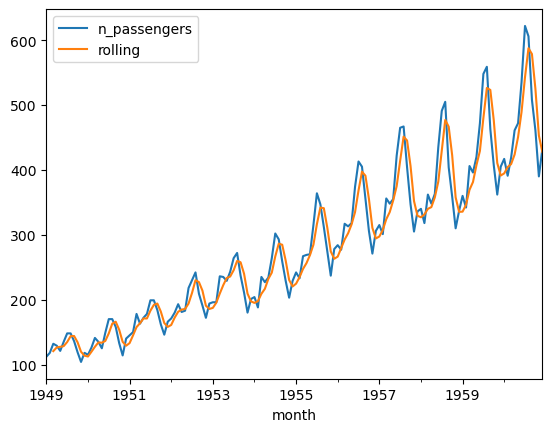

In [10]:
data.plot()
plt.show()

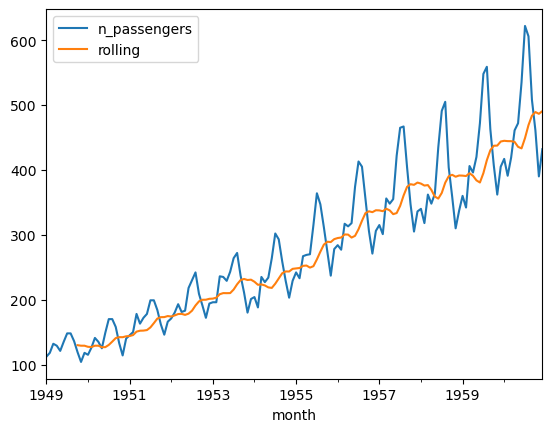

In [12]:
window = 10
data['rolling'] = data['n_passengers'].rolling(window).mean()
data.plot()
plt.show()

# Creating Moving Average

## Programming concepts

### Slicing

In [13]:
prices = [100, 98, 101, 89, 25, 200, 401, "Hola Mundo"]

First 3 prices

In [16]:
prices[:3]

[100, 98, 101]

Last 2 prices

In [17]:
prices[-2:]

[401, 'Hola Mundo']

The fourth and fifth price

In [18]:
prices[3:5]

[89, 25]

## `.loc[]` and `.iloc[]`

In [22]:
data.head()

,n_passengers,rolling
month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


**Acces by index**

In [21]:
data.loc["1949-01-01"]

n_passengers    112.0
rolling           NaN
Name: 1949-01-01 00:00:00, dtype: float64

**Acces by index - slicing**

In [23]:
data.loc["1949-01-01":"1949-05-01"]

,n_passengers,rolling
month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


**Acces by index and columns - slicing**

In [24]:
data.loc["1949-01-01":"1949-05-01", "n_passengers"]

month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: n_passengers, dtype: int64

**General indexes**

In [25]:
data.iloc[0]

n_passengers    112.0
rolling           NaN
Name: 1949-01-01 00:00:00, dtype: float64

In [27]:
data.iloc[:3, 0]

month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: n_passengers, dtype: int64

## `.iterrows()`

In [28]:
for i, row in data.head().iterrows():
    n_passengers = row['n_passengers']
    print(n_passengers)

112.0
118.0
132.0
129.0
121.0


## Aggregate functions

In [29]:
data.head(3).sum()

n_passengers    362.0
rolling           0.0
dtype: float64

In [30]:
data.head(3).mean()

n_passengers    120.666667
rolling                NaN
dtype: float64

## Define functions

In [4]:
def say_hi():
    print("Hi!!")

In [5]:
say_hi()

Hi!!


In [8]:
def say_hi_to_someone(name):
    print("Hi", name, sep=' ')

In [9]:
say_hi_to_someone(name='Vivanco')

Hi Vivanco


In [13]:
num = 10
edad = 20
'{} {}'.format(num, edad)

'10 20'

In [12]:
num = 10
edad = 20
f'{num} {edad}'

'10 20'

In [14]:
def elevar(base, exponente):
    return base ** exponente

In [15]:
elevar(2, 3)

8

# Create SMA
1. Create function `get_mean()` which take the 

In [12]:
data['rolling'] = data['n_passengers'].rolling(3).mean()
data.head()

,n_passengers,rolling
month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333


In [16]:
def get_mean(df:pd.DataFrame, window:int, ind:int) -> float:
    """
    Calculate the mean of a specified window in a dataframe.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        window (int): The size of the moving window.
        ind (int): The current index to calculate the mean for.

    Returns:
        float: The mean of the specified window.
    """
    return df.iloc[ind - window : ind, 0].mean()

In [17]:
get_mean(df=data, window=3, ind=3)

120.66666666666667

In [18]:
get_mean(df=data, window=3, ind=4)

126.33333333333333

In [19]:
import numpy as np
print(np.nan)

nan


In [31]:
def SMA(data:pd.DataFrame, window:int) -> list:
    """
    Calculate the Simple Moving Average (SMA) for a given dataframe.

    Parameters:
        data (pd.DataFrame): The input dataframe.
        window (int): The size of the moving window.

    Returns:
        list: The SMA values as a list.
    """
    ma_values = [np.nan] * (window - 2)
    beginning = window - 1
    ending = data.shape[0] + 1
    #print(ma_values)
    for i in range(beginning, ending):
        ma = get_mean(df=data, window=window, ind=i)
        #print(ma_values)
        ma_values.append(ma)
    return ma_values

In [32]:
SMA(data=data, window=3)[:5]

[nan, nan, 120.66666666666667, 126.33333333333333, 127.33333333333333]

In [33]:
data['window_3'] = SMA(data=data, window=3)
data

,n_passengers,window_3
month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000
